In [5]:
import os
from PIL import Image
import pyocr
import numpy as np
import pyocr.builders
import matplotlib.pyplot as plt
import math
import difflib
import json
import time

In [149]:
path_tesseract = "C:\\Program Files\\Tesseract-OCR"
if path_tesseract not in os.environ["PATH"].split(os.pathsep):
    os.environ["PATH"] += os.pathsep + path_tesseract

tools = pyocr.get_available_tools()
tool = tools[0]

In [150]:
targets = ["normal", "wide", "fastlate"]
border = 215
target = "normal"

In [151]:
img = Image.open("../targets/" + target + ".png")


rgb_img = img.convert('RGB')
size = rgb_img.size

crop_img = rgb_img.crop([0, 0, size[0]/2, size[1]/7])
crop_size = crop_img.size

resize_img = crop_img.resize((math.floor(crop_size[0]/15), math.floor(crop_size[1]/15)))

In [152]:
img2 = Image.new('RGBA',crop_size)

for x in range(crop_size[0]):
    for y in range(crop_size[1]):
        r,g,b = crop_img.getpixel((x,y))

        if 94<r<175 and 179<g<255 and 28<b<108:
            a = 0
        elif 54<r<134 and 144<g<224 and 192<b<255:
            a = 0
        elif 204<r<255 and 135<g<215 and 21<b< 101:
            a = 0
        elif 180<r<255 and 42<g<122 and 64<b<144:
            a = 0
        elif 132<r<212 and 22<g<102 and 190<b<255:
            a = 0
        else:
            a = 255
        
        img2.putpixel((x,y),(a,a,a,255))

In [153]:
builder = pyocr.builders.TextBuilder(tesseract_layout=6)
builder.tesseract_configs.append("-c")
builder.tesseract_configs.append("tessedit_char_whitelist=\"EASYNORMLHDXPT\"")
data = tool.image_to_string(img2, lang="eng", builder=builder)
print(data)

MASTER S


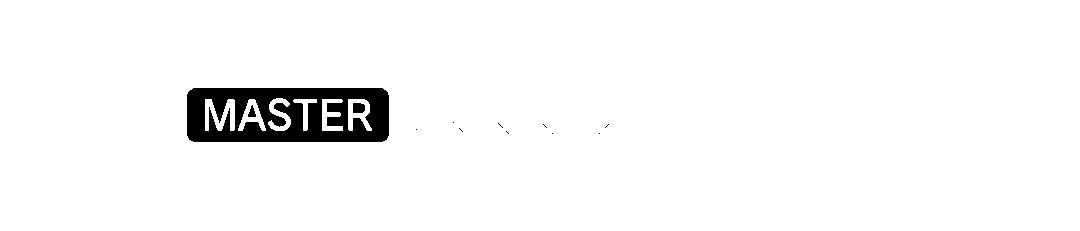

In [154]:
img2

EASY = 134,219,68
NORMAL = 94,184,232
HARD = 244,175,61
EXPERT = 205,91,103
MASTER = 172,62,230

In [155]:
difficults = ["EASY","NORMAL","HARD","EXPERT","MASTER"]

difficult= {"credibility":0,"difficult":""}

for j in difficults:
    result = difflib.SequenceMatcher(None, data, j).ratio()
    
    print(result,j)

    if result > difficult["credibility"]:
        difficult["difficult"] = j
        difficult["credibility"] = result

print("\n" + str(difficult))

0.3333333333333333 EASY
0.2857142857142857 NORMAL
0.3333333333333333 HARD
0.2857142857142857 EXPERT
0.8571428571428571 MASTER

{'credibility': 0.8571428571428571, 'difficult': 'MASTER'}
